In [1]:
import os
import cv2 
from PIL import Image, ImageDraw
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

import keras_ocr

import pytesseract
from pytesseract import Output
from pytesseract import pytesseract as pt

Illegal line #217
	"       - 'Nanum'
"
	in file "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"


## 검증용 데이터셋 준비

In [2]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/'

images = glob(work_dir+'*.jpg')
images.sort()
images

['/home/aiffel0042/aiffel/ocr_python/01.jpg',
 '/home/aiffel0042/aiffel/ocr_python/02.jpg',
 '/home/aiffel0042/aiffel/ocr_python/03.jpg',
 '/home/aiffel0042/aiffel/ocr_python/04.jpg',
 '/home/aiffel0042/aiffel/ocr_python/05.jpg',
 '/home/aiffel0042/aiffel/ocr_python/06.jpg',
 '/home/aiffel0042/aiffel/ocr_python/07.jpg',
 '/home/aiffel0042/aiffel/ocr_python/08.jpg',
 '/home/aiffel0042/aiffel/ocr_python/09.jpg',
 '/home/aiffel0042/aiffel/ocr_python/10.jpg',
 '/home/aiffel0042/aiffel/ocr_python/11.jpg',
 '/home/aiffel0042/aiffel/ocr_python/12.jpg',
 '/home/aiffel0042/aiffel/ocr_python/13.jpg',
 '/home/aiffel0042/aiffel/ocr_python/14.jpg',
 '/home/aiffel0042/aiffel/ocr_python/15.jpg']

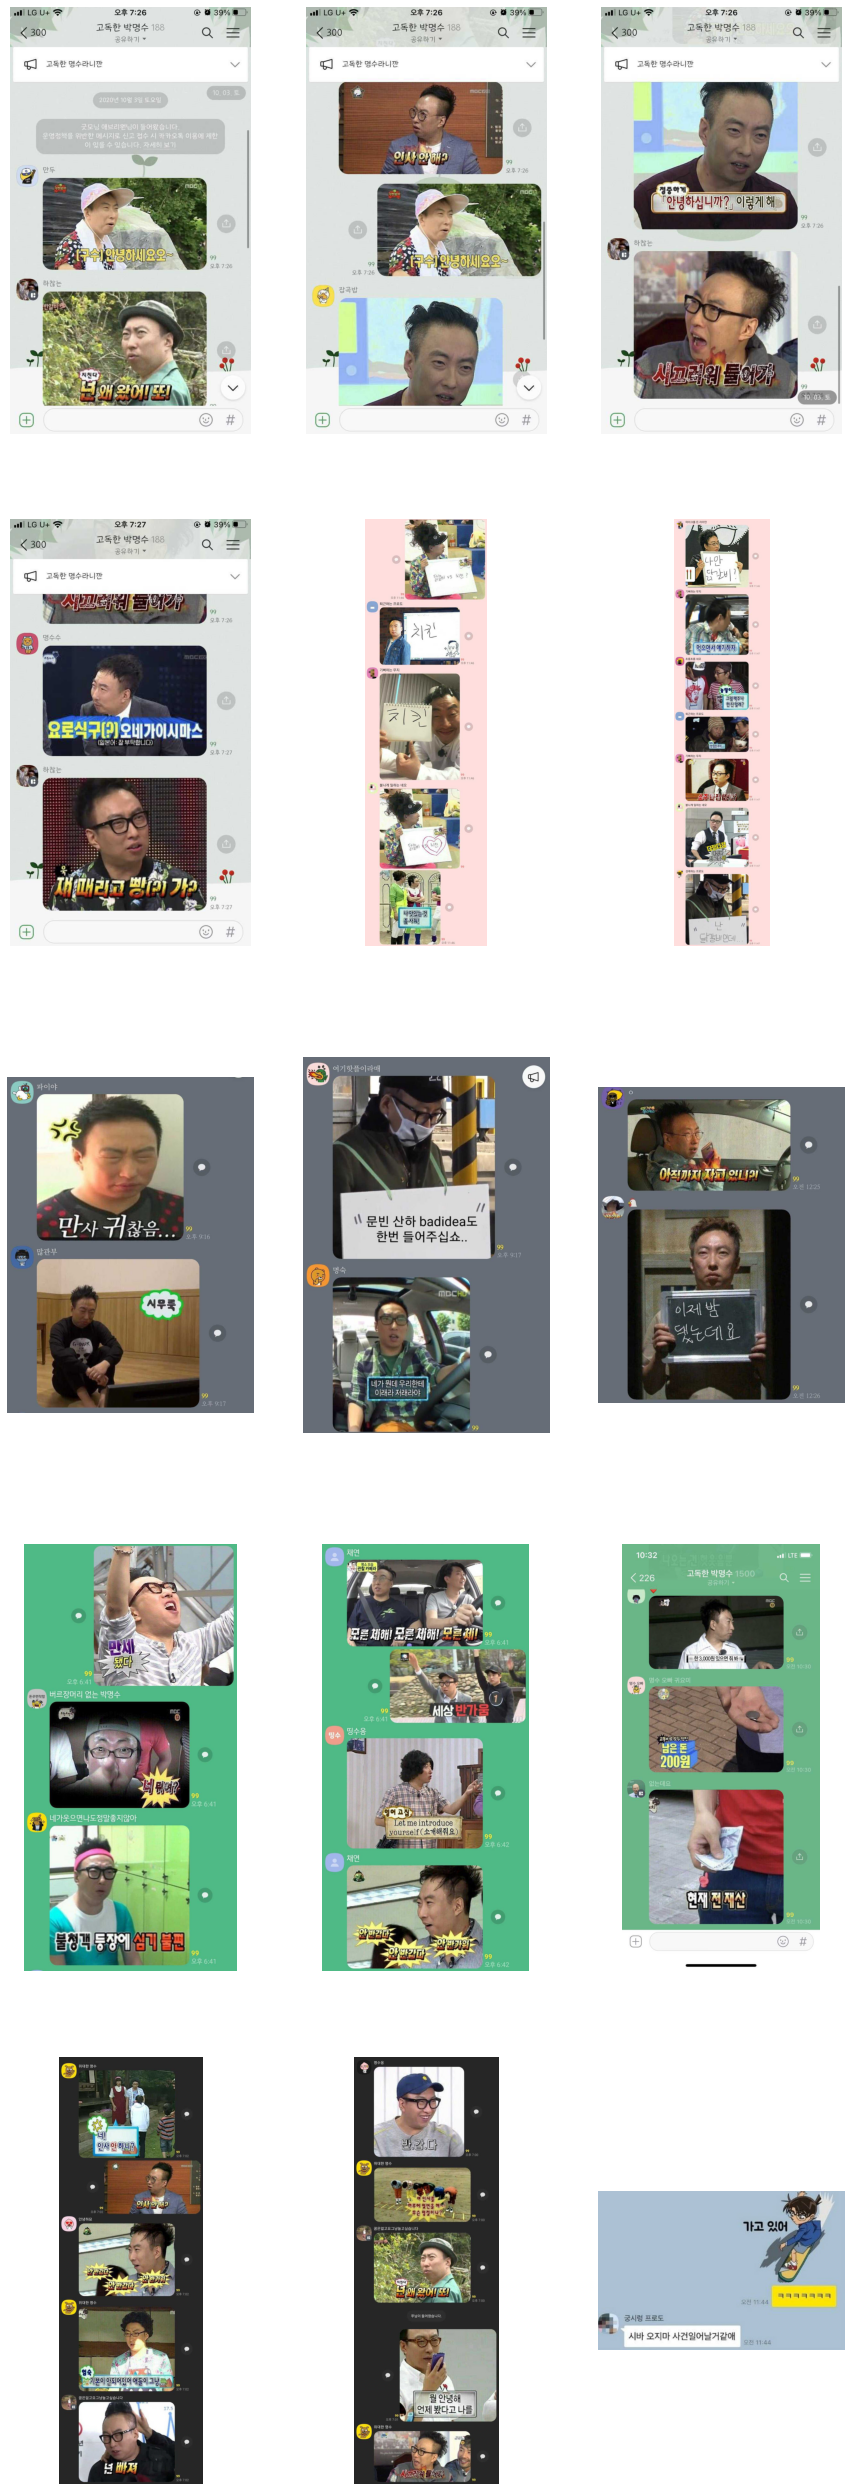

In [18]:
plt.figure(figsize=(15,55))

for idx, im in enumerate(images):
    plt.subplot(6, 3, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

## Google OCR API

In [19]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [20]:
for im in images:
    detect_text(im)

Texts:

"ul LG U+ 3
오후 7:26
@ O 39%
고독한 박명수 188
( 300
Q =
공유하기 ▼
고독한 명수라니깐
10.03. 토
2020년 10월 3일 토요일
굿모닝 애브리원님이 들어왔습니다.
운영정책을 위반한 메시지로 신고 접수 시 카카오톡 이용에 제한
이 있을 수 있습니다. 자세히 보기
만두
MBC
사구수| 안녕하세요오~
99
오후 7:26
하찮는
[지친다
#3
"

"ul"

"LG"

"U+"

"3"

"오후"

"7:26"

"@"

"O"

"39%"

"고독한"

"박명수"

"188"

"("

"300"

"Q"

"="

"공유"

"하기"

"▼"

"고독한"

"명"

"수라"

"니깐"

"10.03"

"."

"토"

"2020"

"년"

"10"

"월"

"3"

"일"

"토요일"

"굿모닝"

"애"

"브리"

"원"

"님"

"이"

"들어"

"왔습니다"

"."

"운영"

"정책"

"을"

"위반"

"한"

"메시지"

"로"

"신고"

"접수"

"시"

"카카오"

"톡"

"이용"

"에"

"제한"

"이"

"있을"

"수"

"있습니다"

"."

"자세히"

"보기"

"만두"

"MBC"

"사구"

"수"

"|"

"안녕하세요"

"오"

"~"

"99"

"오후"

"7:26"

"하"

"찮는"

"["

"지친다"

"#3"
bounds: (666,1269),(707,1269),(707,1309),(666,1309)
Texts:

"ul LG U+
오후7:26
© O 39% O
< 300
고독한 박명수 188
Q =
공유하기 ▼
고독한 명수라니깐
다.
라. 이
2. 법점
3. HE
인사안해?
99
오후 7:26
MDC
구수 인닝하시요오-)
99
오후 7:26
잡곡밥
+,
#
"

"ul"

"LG"

"U+"

"오후"

"7:26"

"©"

"O"

"39%"

"O"

"<"

"300"

"고독한"

"박명수"

"188"

"Q"

"="

"공유"



## keras-ocr

In [21]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


In [22]:
images_keras_ocr = [ keras_ocr.tools.read(im) for im in images]
prediction_groups = [pipeline.recognize([im]) for im in images]

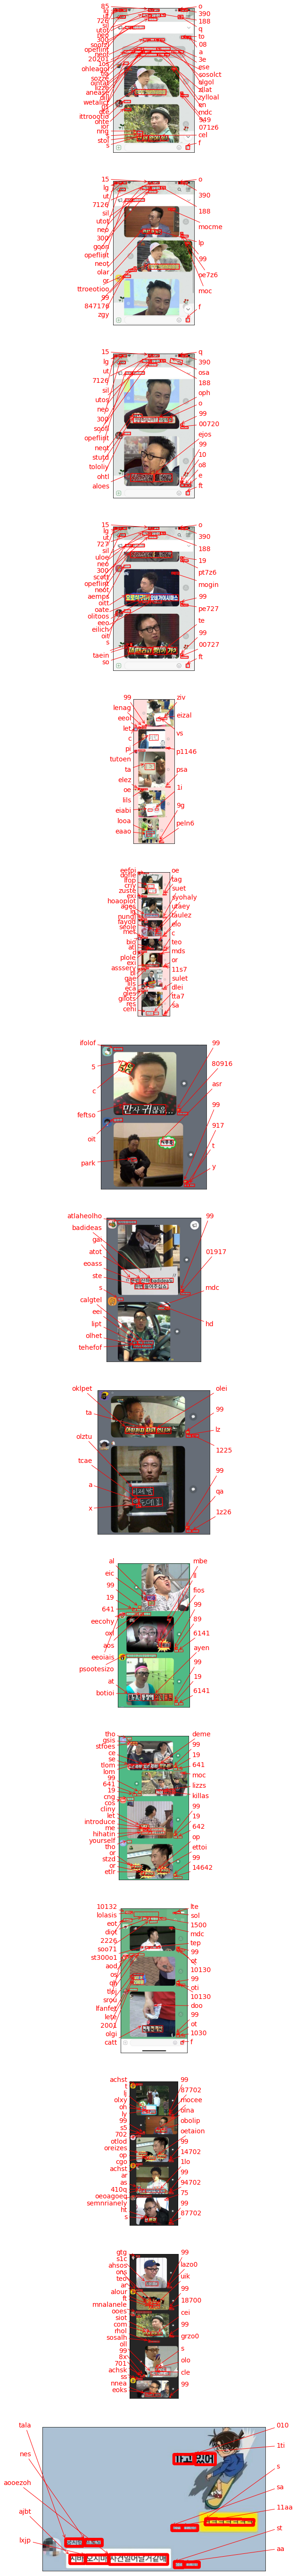

In [23]:
fig, axs = plt.subplots(nrows=len(images_keras_ocr), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_keras_ocr[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## Tesseract

In [24]:
def crop_word_regions(image_path, output_path):
    s = os.path.splitext(image_path)
    s = os.path.split(s[0])
    name = s[1]
    output_path = output_path + name +'/'
    
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 11'
    image = Image.open(image_path)
    img = cv2.imread(image_path)
    
    d = pt.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    top_level = max(d['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(d['level'])):
        level = d['level'][i]
    
        if level == top_level:
            left = d['left'][i]
            top = d['top'][i]
            width = d['width'][i]
            height = d['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return name, cropped_image_path_list, img


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
output_path = work_dir + '/output/'

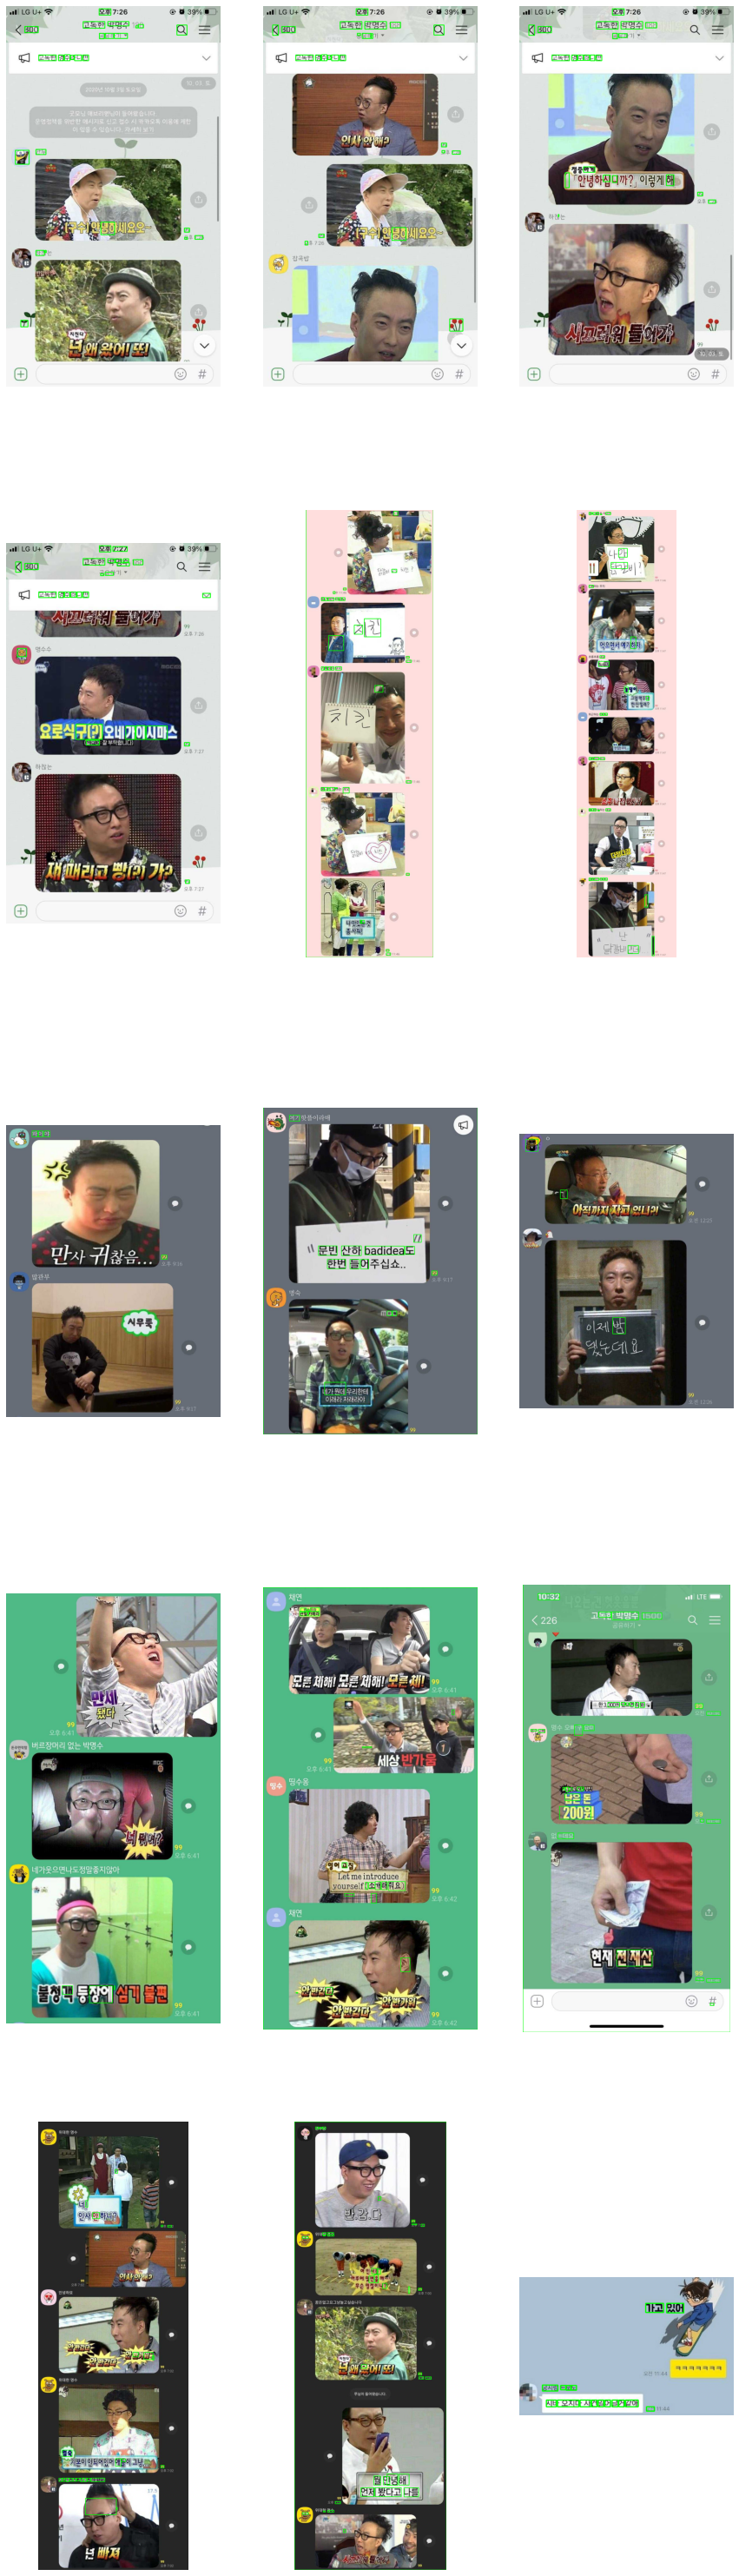

In [26]:
Tesser_dict = {}
img_dict = {}
plt.figure(figsize=(15,55 ))

for idx, path in enumerate(images):    
    name, cropped_image_path_list, imgs = crop_word_regions(path, output_path)
    Tesser_dict[name] = cropped_image_path_list
    img_dict[name] = imgs
    plt.subplot(5, 3, idx+1)
    plt.imshow(imgs)
    plt.axis('off')

In [30]:
def recognize_images(cropped_image_path_list):
    test = []
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pt.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        test.append(recognized_data['text'].replace('\n', '').replace('\x0c',''))
        
    print(test)
    print("Done")

In [32]:
recognize_images(cropped_image_path_list)

['03.', '가고', '있어', '/', '', '종시렁', '느', '도', '', '시너', '| 오지', '| 사', '21', '일', '0', '비', '거', '같애', '2 수거', '11:44']
Done


## 평가

- OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?    
친구들과 카톡을 할 때, 이모티콘이나, 짤을 많이 쓰는데, 굳이 문장을 치지 않아도 간단한 의사표현을 할 수 있어서이다. 고독한 대화방(글없이 사진으로만 대화하는 방)의 경우, 이미지로만 대화를 하는데, 여기서 이미지 내용을 파악할 수 있다면, 사람들이 어떤 내용이 담긴 이미지를 많이 쓰는지 파악을 할 수 있다. 이 또한 사람들의 채팅문화, 텍스트 등. 자연어 데이터가 되지않을까     


- 모델 평가기준이 명확하고 체계적으로 세워졌는가    
카톡 대화방에 있는 이미지 속 글자를 찾아 해석해야 한다.     
    - 구글 OCR API: 세 모델중 가장 한글을 잘 찾아냈다.     
    - keras-ocr: 이미지 속 자막을 잘 찾았지만, 한글지원이 안되어서 아쉽다.    
    - Tesseract: 글자를 못찾고, 사람얼굴이나 배경 등 엉뚱한 곳에 박스가 그려졌다. 세 모델중 가장 성능이 좋지 않은듯하다.     
    
    

- 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?


### 구글 OCR API

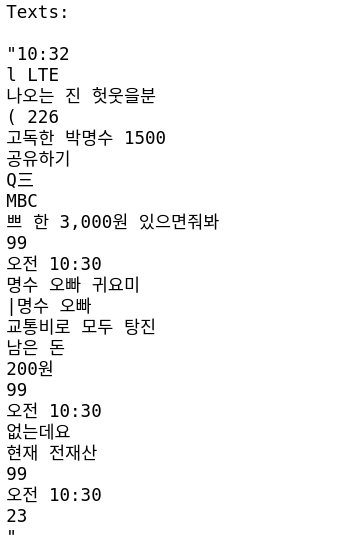

In [33]:
from IPython.display import Image
Image("OCR_API.png")

- 캡처한 휴대폰의 시간부터 채팅방 속 모든 글자를 잘 찾아냈다.
- 세 모델중에 가장 성능이 좋다.

### keras-ocr

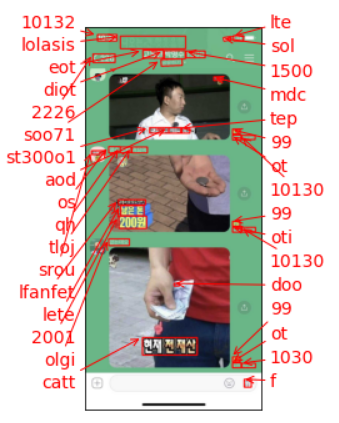

In [34]:
from IPython.display import Image
Image("keras_ocr.png")

- 모든 글차를 찾아 냈지만, 한글을 지원하지않고, 조금있는 영어나 숫자가 틀린 것도 있고 성능이 좋지 않은 듯하다.

### Tesseract

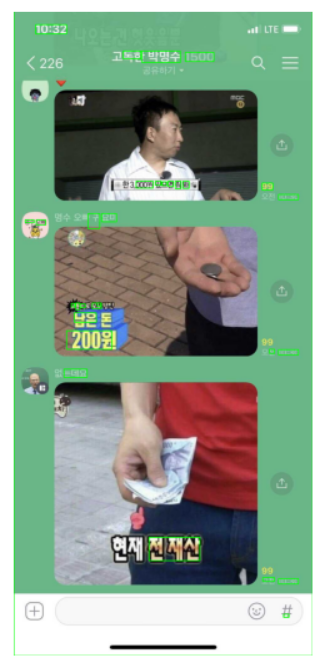

In [35]:
from IPython.display import Image
Image("tesseract.png")

- 글자도 잘 못찾고, 박스도 멋대로다.. 세 모델중 성능이 제일 떨어진다.